In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as scio

%matplotlib inline 

Importing all the libraries

In [2]:
mat = scio.loadmat('HW1_Data/dataset1.mat')

X_trn = mat['X_trn']
Y_trn = mat['Y_trn']
X_tst = mat['X_tst']
Y_tst = mat['Y_tst']
data = [X_trn,Y_trn,X_tst,Y_tst]

In [3]:
print('shape of the data is [%d, %d]' % X_trn.shape)

shape of the data is [120, 1]


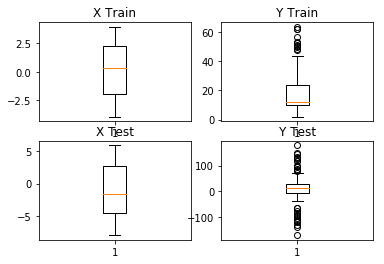

In [4]:
data_labels = ['X Train', 'Y Train', 'X Test', 'Y Test']

for x in range(4):
    plt.subplot(2,2,x +1)
    plt.boxplot(data[x])
    plt.title(data_labels[x])

array([[ 1.41883768],
       [-3.08617234],
       [-2.33266533],
       [-2.38076152],
       [-0.53707415],
       [ 3.03807615],
       [ 2.66933868],
       [ 0.92184369],
       [ 2.49298597],
       [-3.90380762],
       [-2.09218437],
       [-0.2004008 ],
       [-2.90981964],
       [-1.8997996 ],
       [ 0.6492986 ],
       [-3.7755511 ],
       [-2.17234469],
       [ 3.34268537],
       [ 1.13026052],
       [-1.16232465],
       [ 0.90581162],
       [ 0.77755511],
       [ 0.29659319],
       [ 1.56312625],
       [ 1.498998  ],
       [-3.3747495 ],
       [ 1.06613226],
       [-3.74348697],
       [-2.34869739],
       [-2.42885772],
       [ 3.18236473],
       [-1.64328657],
       [ 2.55711423],
       [-1.35470942],
       [ 3.93587174],
       [-0.13627255],
       [-1.14629259],
       [ 1.22645291],
       [ 3.51903808],
       [-0.61723447],
       [-2.79759519],
       [-1.56312625],
       [ 1.32264529],
       [-1.94789579],
       [-3.35871743],
       [ 2